### import os for  operating system operations e.g., creating a folder

In [1]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [2]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [3]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [4]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.5.0


In [5]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [6]:

dataset = pd.read_csv('dataset.csv')

### display dataset

In [7]:
true_values = dataset['WIND-DIRECTION']
dataset.head()

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,JAN-16',33.4,17.7,160,1.9,47.2,25,1005.6
1,FEB-16',37.0,20.8,220,1.4,50.3,26,1005.0
2,MAR-16',41.0,26.1,250,1.1,63.9,28,1003.1
3,APR-16',40.7,29.0,270,2.7,32.1,52,1003.4
4,MAY-16',36.7,26.8,210,2.6,66.2,75,1005.4


### dataset characteristics

In [8]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,34.803030,23.318182,185.454545,2.121212,48.207576,51.257576,1006.287879
std,3.308449,3.230523,56.546287,0.793728,16.390328,22.489184,2.018111
min,28.500000,13.900000,60.000000,0.800000,18.900000,11.000000,1002.300000
25%,31.800000,20.875000,150.000000,1.525000,33.300000,29.250000,1005.325000
50%,34.350000,24.000000,190.000000,2.000000,47.600000,53.500000,1006.550000
75%,36.975000,25.300000,240.000000,2.600000,61.350000,71.750000,1007.975000
max,41.100000,29.400000,270.000000,4.600000,98.300000,82.000000,1010.000000


### Check for null and NaN values

In [9]:

dataset.isna().sum()

DATE                   0
MAXIMUM-TEMPERATURE    0
MINIMUM-TEMPERATURE    0
WIND-DIRECTION         0
WIND-SPEED             0
WIND-RUN               0
RELATIVE-HUMIDITY      0
AIR-PRESSURE           0
dtype: int64

### copy dataset

In [10]:

df = dataset[:]

### remove the date column

In [11]:

del df['DATE']

In [12]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.4,17.7,160,1.9,47.2,25,1005.6
1,37.0,20.8,220,1.4,50.3,26,1005.0
2,41.0,26.1,250,1.1,63.9,28,1003.1
3,40.7,29.0,270,2.7,32.1,52,1003.4
4,36.7,26.8,210,2.6,66.2,75,1005.4
...,...,...,...,...,...,...,...
61,36.0,22.4,170,3.4,63.7,26,1006.9
62,39.7,26.1,220,2.1,73.7,35,1005.6
63,39.7,28.8,200,4.6,84.2,65,1002.6
64,35.6,25.3,130,2.6,98.3,75,1005.4


In [13]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (66, 7)


### Summary of information on the dataset.

In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  66 non-null     float64
 1   MINIMUM-TEMPERATURE  66 non-null     float64
 2   WIND-DIRECTION       66 non-null     int64  
 3   WIND-SPEED           66 non-null     float64
 4   WIND-RUN             66 non-null     float64
 5   RELATIVE-HUMIDITY    66 non-null     int64  
 6   AIR-PRESSURE         66 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 3.7 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [15]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(39, 7)
(27, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [16]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(13, 7)
(14, 7)


In [17]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (39, 7)
Test dataset       : (13, 7)
Validation dataset : (14, 7)


## Plot the relationship between each two variables to spot anything incorrect.

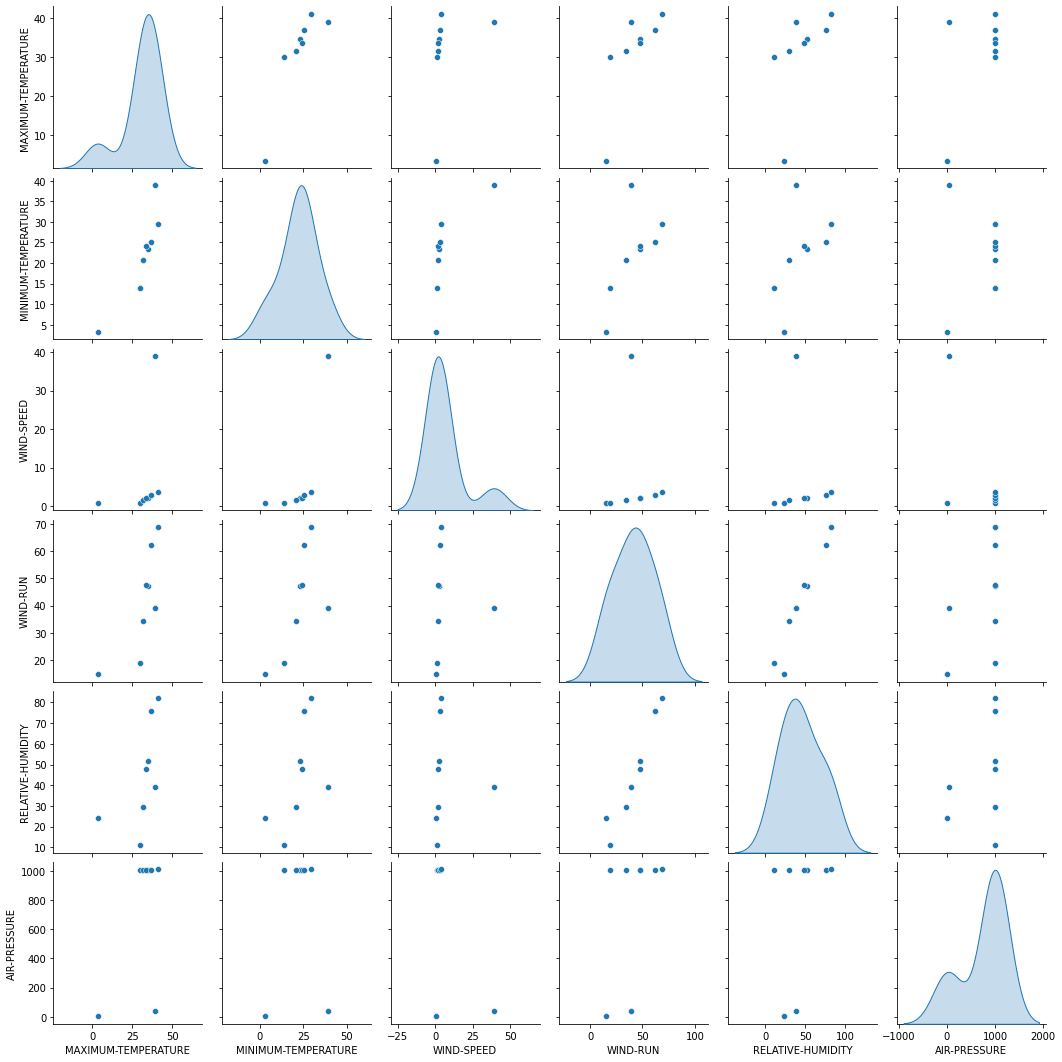

In [18]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [19]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count     39.000000
mean     188.974359
std       56.419242
min       80.000000
25%      150.000000
50%      190.000000
75%      240.000000
max      270.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-DIRECTION"

In [20]:
train_labels = train_dataset.pop('WIND-DIRECTION')
test_labels = test_dataset.pop('WIND-DIRECTION')
valid_labels = valid_dataset.pop('WIND-DIRECTION')

## Data Normalization/Scaling

## Subtract the mean of the training data and divide by the standard deviation

### define a function to normalize the data set.

In [21]:

def norm(x):
    return (x - train_stats['mean'] / train_stats['std'])
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [22]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (39, 6) 
Test        : (13, 6) 
Validate    : (14, 6) 
Train/Test/Validate labels: 
Train Labels : (39,)
Test Labels  : (13,)
Test Labels  : (14,)


## show a sample of the data after normalized

In [23]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
37,21.360332,15.221,0.428292,33.103607,8.835129,520.278275
33,24.960332,17.621,-1.271708,34.903607,67.835129,521.178275
65,22.560332,16.621,0.828292,15.703607,74.835129,522.278275
47,19.760332,6.721,0.228292,59.703607,15.835129,521.578275
30,22.260332,16.921,-0.971708,24.103607,74.835129,524.378275
25,28.860332,17.021,0.228292,32.403607,18.835129,518.778275
54,21.260332,17.021,-0.871708,43.203607,76.835129,524.678275
17,22.860332,17.921,-0.171708,63.103607,68.835129,521.378275
15,29.760332,21.321,-0.271708,65.603607,45.835129,517.378275
1,26.760332,13.621,-1.371708,47.103607,23.835129,519.678275


## Build a Neural Network Model

### We declared a function for creating a model.

In [24]:


def model1_single_layer_perceptron():
    model = keras.Sequential([
       keras.layers.Dense(1,input_shape=(6,)) 
    ])
    model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse','mape'])
    
    return model
    
        

In [25]:
model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


## import NN and other components.

In [26]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [27]:
def model2_multilayer_perceptron_with_one_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 10 Neurons
      model.add(Dense(10, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(35, Activation('relu'))) # Hidden layer 1

      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model


In [28]:
model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 35)                385       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [29]:
def model3_multilayer_perceptron_with_two_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
    
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
    
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [30]:
model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')


model3.summary()


Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


## Test the model before training (this will use the initial weights)

In [31]:

example_batch = normed_train_data[:10] # take the first 10 data points from the training data.
example_result = model1.predict(example_batch) # Here we are using the single layer perceptron model



## Compare the predicted values with the actual values 

In [32]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(true_values[:10].to_string(index=False))

Predicted Values
[[-431.21246]
 [-407.99573]
 [-411.91214]
 [-422.295  ]
 [-411.0852 ]
 [-425.2476 ]
 [-406.1749 ]
 [-401.76495]
 [-405.90738]
 [-419.83597]]

Actual Values
160
220
250
270
210
260
250
240
250
260


## Save checkpoints during training

In [33]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

## Training the model we built above.

### Training the single layer perceptron

In [34]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [35]:
%%time

EPOCHS = 500
batch_size = 6

model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

with tf.device('/CPU:0'):
    history = model1.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:7829.3940,  mae:77.2378,  mape:33.0897,  mse:7829.3940,  val_loss:5696.4248,  val_mae:63.3902,  val_mape:31.6046,  val_mse:5696.4248,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_dir

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets

Epoch: 100, loss:1993.5548,  mae:39.8509,  mape:20.7118,  mse:1993.5548,  val_loss:2997.7222,  val_mae:49.5760,  val_mape:32.3512,  val_mse:2997.7222,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow

In [36]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,3055.131592,33.279636,3055.131592,33.128780,3055.363281,47.081177,3055.363281,33.831196,495
496,2441.244873,39.670151,2441.244873,16.555191,3056.739746,47.090206,3056.739746,33.849277,496
497,2924.665039,51.790211,2924.665039,29.329798,3058.008301,47.098415,3058.008301,33.865845,497
498,3465.989502,41.934109,3465.989502,36.809448,3058.408447,47.101009,3058.408447,33.871059,498
499,1112.488647,24.369936,1112.488647,14.262626,3059.210938,47.106251,3059.210938,33.881466,499


In [37]:
# Test the model after training
example_batch = normed_train_data[:10]
example_result = model1.predict(example_batch)

## Compare the predicted values with the actual values

In [38]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(true_values[:10].to_string(index=False))

Predicted Values
[[154.09743]
 [204.2334 ]
 [204.69467]
 [162.82823]
 [207.2855 ]
 [166.95998]
 [209.90067]
 [205.20609]
 [191.2232 ]
 [172.84729]]

Actual Values
160
220
250
270
210
260
250
240
250
260


In [39]:
print('The ground truth: ')
train_labels[:10]

The ground truth: 


37    100
33    240
65    160
47    100
30    200
25    150
54    220
17    190
15    160
1     220
Name: WIND-DIRECTION, dtype: int64

## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

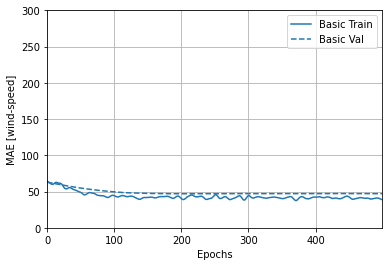

In [40]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,300])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

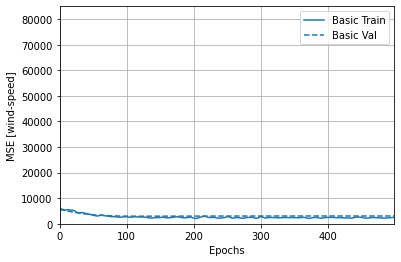

In [41]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,85000])
plt.ylabel('MSE [wind-speed]')

In [42]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model1.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
2/2 - 0s - loss: 2392.6855 - mae: 41.3643 - mse: 2392.6855 - mape: 26.6798
Train set Mean Abs Error : 41.36
Train set Mean Square Error : 2392.69


In [43]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
1/1 - 0s - loss: 3059.2109 - mae: 47.1063 - mse: 3059.2109 - mape: 33.8815
Validation set Mean Abs Error : 47.11
Validation set Mean Square Error : 3059.21


In [44]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
1/1 - 0s - loss: 2872.4341 - mae: 38.1623 - mse: 2872.4341 - mape: 32.8095
Testing set Mean Abs Error : 38.16
Testing set Mean Square Error : 2872.43


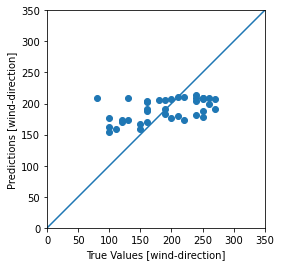

In [45]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

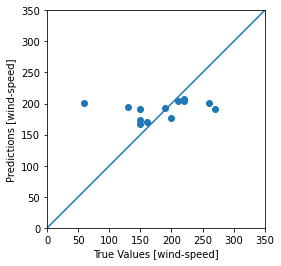

In [46]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

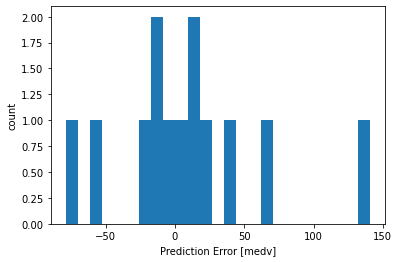

In [47]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## One hidden layer analysis

In [48]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction2.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [49]:
%%time

EPOCHS = 500
batch_size = 6

model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

with tf.device('/CPU:0'):
    history = model2.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_10 (Dense)             (None, 35)                385       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:83144.2266,  mae:284.1523,  mape:128.8401,  mse:83144.2266,  val_loss:46638.9883,  val_mae:208.2187,  val_mape:118.7829,  val_mse:46638.9883,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...
Epoch: 100, loss:3786.2424,  mae:57.0256,  mape:39.2594,  mse:3786.2424,  val_loss:3332.9331,  val_mae:50.0050,  val_mape:37.1688,  val_mse:3332.9331,  
....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...
Epoch: 200, loss:5066.9546,  mae:60.3384,  mape:51.7157,  mse:5066.9546,  val_loss:3025.3918,  val_mae:48.9949,  val_mape:33.9490,  val_mse:3025.3918,  
..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...................
Epoch: 300, loss:1271.5970,  mae:30.6756,  mape:15.7573,  mse:1271.5970,  val_loss:3075.4258,  val_mae:47.5667,  val_mape:34.7140,  val_mse:3075.4258,  
........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


................................
Epoch: 400, loss:2085.5422,  mae:43.3256,  mape:24.4479,  mse:2085.5422,  val_loss:3188.7271,  val_mae:47.3964,  val_mape:35.5149,  val_mse:3188.7271,  
....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


............................................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


............Wall time: 2min 58s


In [50]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,5189.010254,56.844833,5189.010254,52.421143,2962.164062,45.910931,2962.164062,33.200645,495
496,1693.516602,41.137951,1693.516602,19.623528,3051.803955,46.382542,3051.803955,34.168354,496
497,1313.349243,32.749420,1313.349243,14.897629,3221.423096,47.073429,3221.423096,35.578651,497
498,2173.678955,38.855537,2173.678955,22.059931,3218.374512,47.103569,3218.374512,35.591755,498
499,4129.306641,63.058838,4129.306641,50.137894,2880.533691,45.988132,2880.533691,31.947954,499


In [51]:
# Test the model after training
example_batch = normed_train_data[:10]
example_result = model2.predict(example_batch)

## Compare the predicted values with the actual values

In [52]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(true_values[:10].to_string(index=False))

Predicted Values
[[151.57736]
 [198.86478]
 [198.64685]
 [151.9455 ]
 [202.62688]
 [159.78146]
 [206.43442]
 [201.25061]
 [186.3875 ]
 [163.70085]]

Actual Values
160
220
250
270
210
260
250
240
250
260


In [53]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,5189.010254,56.844833,5189.010254,52.421143,2962.164062,45.910931,2962.164062,33.200645,495
496,1693.516602,41.137951,1693.516602,19.623528,3051.803955,46.382542,3051.803955,34.168354,496
497,1313.349243,32.749420,1313.349243,14.897629,3221.423096,47.073429,3221.423096,35.578651,497
498,2173.678955,38.855537,2173.678955,22.059931,3218.374512,47.103569,3218.374512,35.591755,498
499,4129.306641,63.058838,4129.306641,50.137894,2880.533691,45.988132,2880.533691,31.947954,499


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

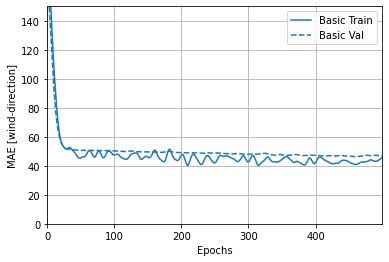

In [54]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,150])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

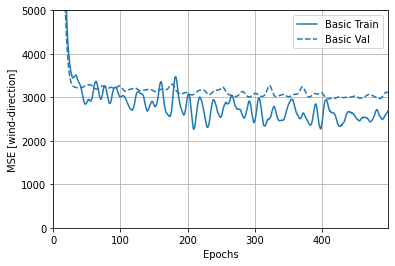

In [55]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [56]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model2.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
2/2 - 0s - loss: 2366.5186 - mae: 40.8960 - mse: 2366.5186 - mape: 25.4260
Train set Mean Abs Error : 40.90
Train set Mean Square Error : 2366.52


In [57]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
1/1 - 0s - loss: 2880.5337 - mae: 45.9881 - mse: 2880.5337 - mape: 31.9480
Validation set Mean Abs Error : 45.99
Validation set Mean Square Error : 2880.53


In [58]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
1/1 - 0s - loss: 2784.1597 - mae: 37.3954 - mse: 2784.1597 - mape: 31.3647
Testing set Mean Abs Error : 37.40
Testing set Mean Square Error : 2784.16


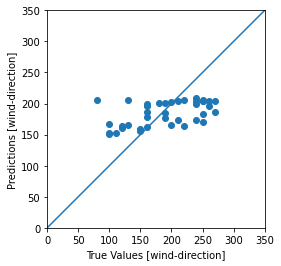

In [59]:
train_predictions = model2.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

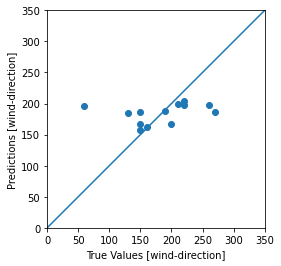

In [60]:
test_predictions = model2.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

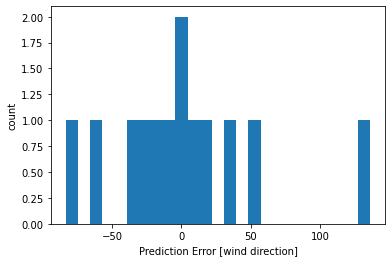

In [61]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [wind direction]")
_ = plt.ylabel("count")

## Two hidden layer analysis

In [62]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction3.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [63]:
%%time

EPOCHS = 500
batch_size = 6

model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')
model3.summary()

with tf.device('/CPU:0'):
    history = model3.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:56863.8125,  mae:235.1340,  mape:108.0672,  mse:56863.8125,  val_loss:26713.2129,  val_mae:153.1612,  val_mape:84.0361,  val_mse:26713.2129,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets



Epoch: 100, loss:4150.1880,  mae:54.0495,  mape:41.8412,  mse:4150.1880,  val_loss:2913.9146,  val_mae:46.9666,  val_mape:32.6517,  val_mse:2913.9146,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...............................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......
Epoch: 200, loss:1042.4415,  mae:25.0740,  mape:11.3477,  mse:1042.4415,  val_loss:3100.1072,  val_mae:47.0362,  val_mape:35.1227,  val_mse:3100.1072,  
..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...................
Epoch: 300, loss:1959.7407,  mae:40.4270,  mape:28.8533,  mse:1959.7407,  val_loss:2833.0017,  val_mae:45.6061,  val_mape:31.2606,  val_mse:2833.0017,  
.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........
Epoch: 400, loss:3188.0076,  mae:55.5555,  mape:22.1154,  mse:3188.0076,  val_loss:4348.5649,  val_mae:50.8714,  val_mape:41.1384,  val_mse:4348.5649,  
...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


................................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...................Wall time: 2min 15s


In [64]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,1422.761597,30.531464,1422.761597,17.134829,2636.565918,42.884003,2636.565918,30.033497,495
496,3339.515381,51.852814,3339.515381,34.749710,2610.085205,45.003475,2610.085205,28.329380,496
497,1989.674927,34.642796,1989.674927,18.422640,2630.580811,42.809185,2630.580811,30.364763,497
498,1699.682251,34.947372,1699.682251,15.916348,3405.953369,45.207249,3405.953369,35.377598,498
499,1946.929199,41.235920,1946.929199,30.707998,2531.897217,43.973289,2531.897217,28.639391,499


In [65]:
# Test the model after training
example_batch = normed_train_data[:10]
example_result = model3.predict(example_batch)


## Compare the Actual Values with the predicted values

In [66]:
print('Predicted Values')
print(example_result[:10])
print()
print('Actual Values')
print(true_values[:10].to_string(index=False))

Predicted Values
[[ 98.129974]
 [194.18788 ]
 [183.00458 ]
 [126.530945]
 [190.0343  ]
 [124.07463 ]
 [203.37396 ]
 [204.49083 ]
 [199.06133 ]
 [142.6946  ]]

Actual Values
160
220
250
270
210
260
250
240
250
260


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

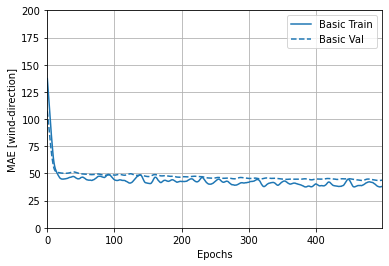

In [67]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,200])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

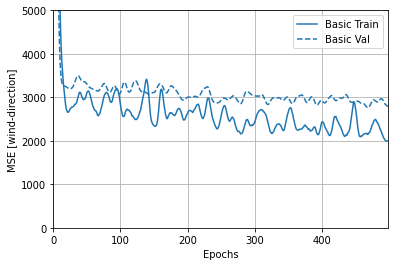

In [68]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [69]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model3.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
2/2 - 0s - loss: 2252.3230 - mae: 39.2949 - mse: 2252.3230 - mape: 22.2462
Train set Mean Abs Error : 39.29
Train set Mean Square Error : 2252.32


In [70]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
1/1 - 0s - loss: 2531.8972 - mae: 43.9733 - mse: 2531.8972 - mape: 28.6394
Validation set Mean Abs Error : 43.97
Validation set Mean Square Error : 2531.90


In [71]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
1/1 - 0s - loss: 3099.9648 - mae: 44.9624 - mse: 3099.9648 - mape: 34.7622
Testing set Mean Abs Error : 44.96
Testing set Mean Square Error : 3099.96


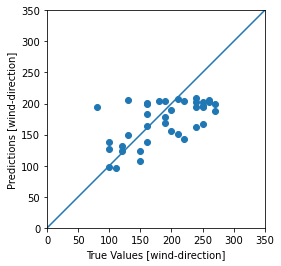

In [72]:
train_predictions = model3.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

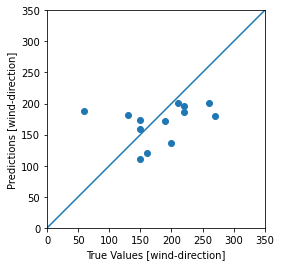

In [73]:
test_predictions = model3.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

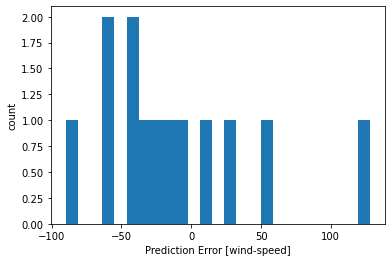

In [74]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [wind-speed]")
_ = plt.ylabel("count")